<a href="https://colab.research.google.com/github/dev02chandan/Signal-and-Image-Processing/blob/main/9_Erosion_and_Dilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Aim:**

    a. Perform erosion on the given test image using a square structuring element of size 11x11,15x15, 45x45.

    b. Analyse the effect of changing structuring element and increasing structuring element size on the eroded image.

    c. Perform dilation on the given test image with broken text characters using a suitable structuring element to show that the broken segments were joined.

### Imports and Reading Images

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pcb = cv2.imread("pcb.tif",0)

In [6]:
# Getting the shape of the image
m,n = pcb.shape
print(m,n)

486 486


Text(0.5, 1.0, 'Original Image of PCB')

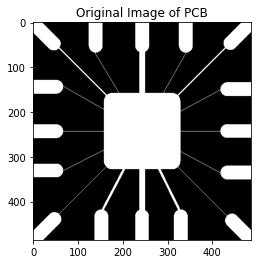

In [7]:
plt.imshow(pcb , cmap="gray")
plt.title("Original Image of PCB")

In [8]:
text = cv2.imread("text.tif",0)

In [9]:
m1,n1 = text.shape
print(m1,n1)

444 508


Text(0.5, 1.0, 'Original Image of Text')

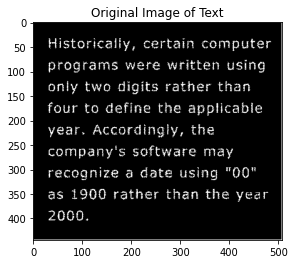

In [10]:
plt.imshow(text, cmap='gray')
plt.title("Original Image of Text")

### Defining Functions for Erosion and Dilation

In [11]:
def Erosion(img):

    m,n = img.shape

    k=int(input("Enter the size of the structuring element: "))
    # Gives the size of the structuring element
    SE= np.ones((k,k), dtype=np.uint8) 
    # SE is structuring element
    constant= (k-1)//2
    

    new_img = np.zeros((m,n), dtype = np.uint8)
    # creating the image of the same size

    for i in range(constant, m-constant):
        for j in range(constant, n-constant):
            temp =  img[i-constant:i+constant+1, j-constant: j+constant+1]
            product = temp*SE
            new_img[i,j]= np.min(product)
            # if there is 0 - 0 is returned - else 1

    return new_img

In [12]:
def plotting(img, new_image, erosion=True):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")

    if(erosion==False):
        plt.subplot(1,2,2)
        plt.imshow(new_image, cmap="gray")

    else: 
        plt.subplot(1,2,2)
        plt.imshow(new_image, cmap="gray")
        plt.title("Eroded Image")

In [13]:
def Dilation(img):
    p,q= text.shape

    SED= np.array([[0,1,0], [1,1,1], [0,1,0]])
    constant1= 1

    imgDilate= np.zeros((p,q), dtype= np.uint8)


    for i in range(constant1, p-constant1):
        for j in range(constant1, q-constant1):
            temp= text[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
            product= temp*SED
            imgDilate[i,j]= np.max(product)

    return imgDilate

### Erosion: 

Erosion removes pixels on object boundaries

Size of Structuring element = 11

Enter the size of the structuring element: 11


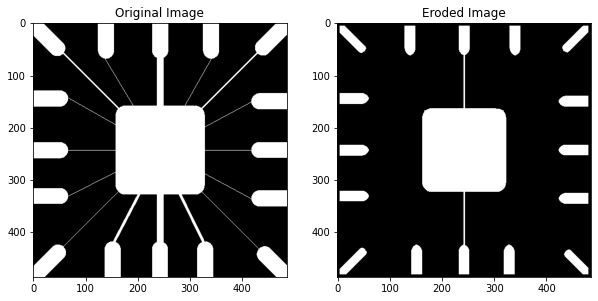

In [14]:
# Erosion on PCB
Eroded_pcb = Erosion(pcb)
plotting(pcb, Eroded_pcb)

Size of Structuring element = 15

Enter the size of the structuring element: 15


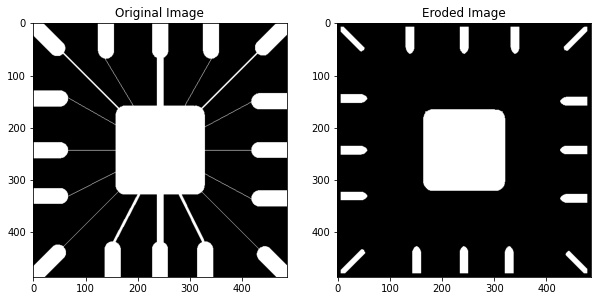

In [15]:
# Erosion on PCB
Eroded_pcb = Erosion(pcb)
plotting(pcb, Eroded_pcb)

Size of Structuring element = 45

Enter the size of the structuring element: 45


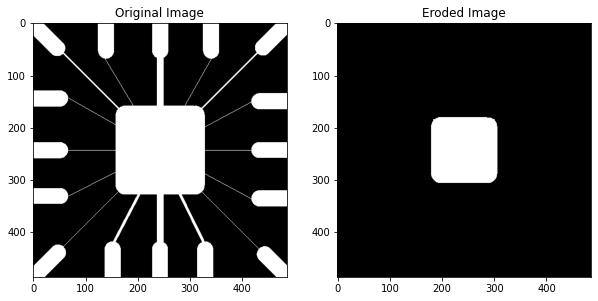

In [16]:
# Erosion on PCB
Eroded_pcb = Erosion(pcb)
plotting(pcb, Eroded_pcb)

### Dilation

Dilation adds pixels to the boundaries of objects in an image.

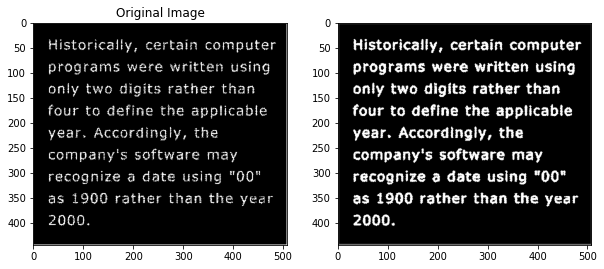

In [17]:
# Dilation on Text
Dilated_text = Dilation(text)
plotting(text, Dilated_text, erosion=False)

### Conclusion: 
1. We performed Erosion with a 11x11 , 15x15 and 45x45 Sized structuring elements.

    We observed that as the size of the structuring element increases, thicker white lines are removed from the image.

2. For Dilation we see that the broken characters are joined and the text is more readable after Dilation.